In [20]:
import matplotlib as plt
import textwrap

In [3]:
import sys
sys.path.append('..')
from utils import *

In [99]:
prompt_template='../prompt_template.md'
arxiv_number='1106.6060'
prompt_dict=load_prompt_template(prompt_template)
with open(os.path.join('..',f'{arxiv_number}',f'{arxiv_number}.yaml'),'r') as f:
    kwargs= yaml.safe_load(f)

In [100]:
kwargs[1]['score']

{'in_paper': 2,
 'prompt_quality': 2,
 'follow_instructions': 2,
 'physics_logic': 2,
 'math_derivation': 2,
 'final_answer_accuracy': 2}

In [101]:
tasks = [f'Task:{len(kwargs)-idx-2} '+kwarg['task'] for idx,kwarg in enumerate(kwargs[:0:-1])]
aspect_score={}
for kwarg in kwargs[:0:-1]:
    for key,value in reversed(list(kwarg['score'].items())):
        if key not in aspect_score:
            aspect_score[key]=[value]
        else:
            aspect_score[key].append(value)

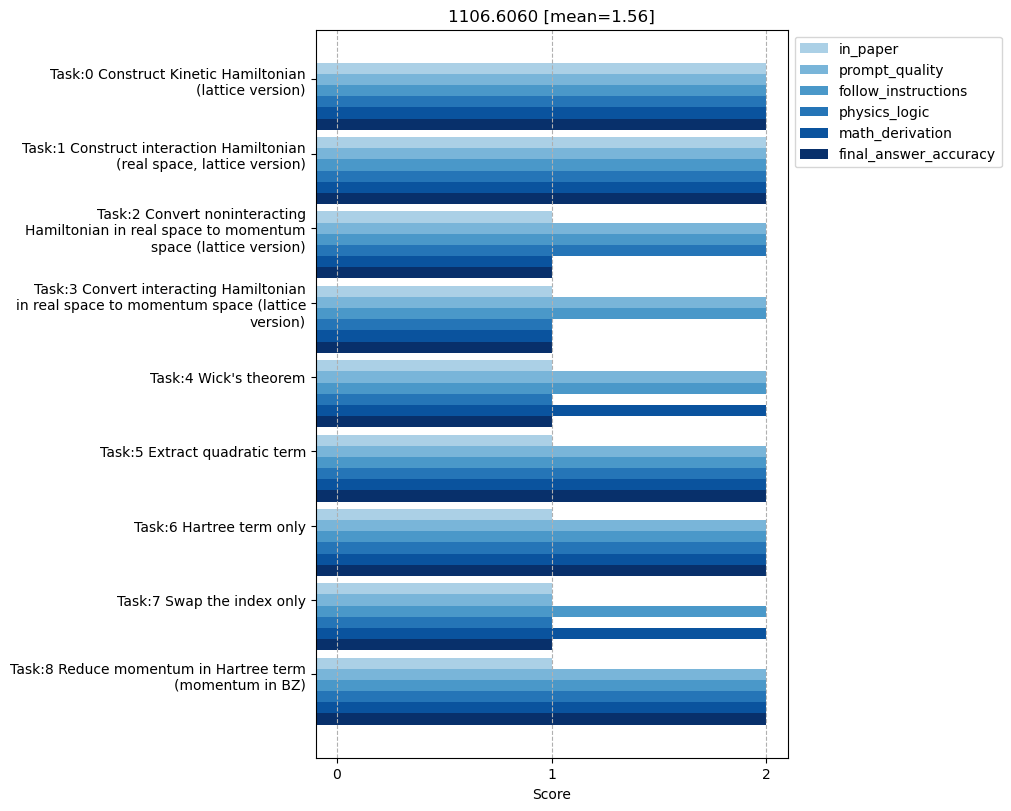

In [102]:
import matplotlib.pyplot as plt
import numpy as np

tasks = [f'Task:{len(kwargs)-idx-2} '+kwarg['task'] for idx,kwarg in enumerate(kwargs[:0:-1])]
aspect_score={}
for kwarg in kwargs[:0:-1]:
    for key,value in reversed(list(kwarg['score'].items())):
        if key not in aspect_score:
            aspect_score[key]=[value]
        else:
            aspect_score[key].append(value)


x = np.arange(len(tasks))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize=(10,8))
color_list=[plt.cm.Blues(0.2+0.8*(i/6)) for i in range(6,0,-1)]
for attribute, measurement in aspect_score.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, np.array(measurement)+0.1, width, label=attribute,color=color_list[multiplier],left=-0.1)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_xlabel('Score')
ax.set_xticks([0,1,2])
ax.set_title(f"{arxiv_number} [mean={np.mean(aspect_score['final_answer_accuracy']):.2f}]")
ax.set_yticks(x + width*4, ['\n'.join(textwrap.wrap(task, width=40)) for task in tasks])

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='upper left', ncols=1,bbox_to_anchor=(1, 1))

ax.grid(axis='x',ls='--')
# ax.set_ylim(0, 250)
ax.set_xlim(-0.1,2.1)

plt.show()

In [93]:
aspect_score

{'final_answer_accuracy': [2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1],
 'math_derivation': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 'physics_logic': [2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2],
 'follow_instructions': [2, 2, 2, None, 0, 2, 2, 1, 2, 2, 2],
 'prompt_quality': [1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1],
 'in_paper': [1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1]}